In [ ]:

# -*- coding: utf-8 -*-
"""
Created on Sun Dec  5 21:45:08 2021
@author: eddyt
"""
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  5 20:02:31 2021
@author: eddyt
"""
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  5 19:06:23 2021
@author: eddyt
"""
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 29 19:59:10 2021
@author: eddyt
"""

# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import Minuit


#%%

# splitting dataset into analysis q2 bins (9 total)

df = pd.read_pickle('total_dataset.pkl')
df = pd.read_pickle('sig.pkl')

q2 = df['q2']

bin_ranges = [[0.1, 0.98],
              [1.1, 2.5],
              [2.5, 4.0],
              [4.0, 6.0],
              [6.0, 8.0],
              [15.0,17.0],
              [17.0,19.0],
              [11.0, 12.5],
              [1.0,6.0],
              [15.0,17.9]]

n = len(bin_ranges)

bins = [[] for i in range(n)]

for i in range(n):
    bins[i] = df[(df['q2'] > bin_ranges[i][0]) & (df['q2'] < bin_ranges[i][1])]
    

#%%

# displaying angular distribution for example bin

bins[0].head()

plt.hist(bins[3]['costhetal'], bins=25, density=True)
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.grid()
plt.show()

#%%
# load dataset for acceptance function sample 

df = pd.read_pickle('acceptance_mc.pkl')

#%%

# creating acceptance function (q2ac) bin ranges (60 total)

'''
bin ranges:
0.1 < q2 < 1 : 0.1
1.0 < q2 < 6.0 : 0.2
6.0 < q2 < 22.0 : 0.5
'''

# legendre_bin_markers = []
# range1 = np.arange(0, 1, 0.1)
# range2 = np.arange(1, 6, 0.2)
# # range3 = np.arange(6, 22.5, 0.5)
# range3 = np.arange(6, 22, 0.5)
# for i in range1:
#     legendre_bin_markers.append(i)
# for i in range2:
#     legendre_bin_markers.append(i)
# for i in range3:
#     legendre_bin_markers.append(i)

legendre_bin_ranges = [[0.0, 2.0],
                      [2.0, 4.0],
                      [4.0, 6.0],
                      [6.0, 8.0],
                      [8.0, 10.0],
                      [10.0,12.0],
                      [12.0,14.0],
                      [14.0, 16.0],
                      [16.0,18.0],
                      [18.0,21.5]]


# print("legendre_bin")
print(legendre_bin_ranges)
# print(" ")

In [41]:
# legendre_bin_ranges = [[] for i in range(len(legendre_bin_markers) - 1)]
# # print(legendre_bin_ranges)
# # print(" ")

    
# for i in range(len(legendre_bin_ranges)):
#     legendre_bin_ranges[i].append(legendre_bin_markers[i])
#     legendre_bin_ranges[i].append(legendre_bin_markers[i+1])

bins_legendre = [[] for i in range(len(legendre_bin_ranges))]
for i in range(len(bins_legendre)):
    bins_legendre[i] = df[(df['q2'] > legendre_bin_ranges[i][0]) & (df['q2'] < legendre_bin_ranges[i][1])]

print(bins_legendre[9])
# print(legendre_bin_ranges)
# print(" ")
# print(len(legendre_bin_ranges))

# # print("separate")
# print(" ")
# # print(bins_legendre[1])

# print(len(bins_legendre[1]))
# print(len(df))

#%%

# creating arrays of angles in separate q2 bins

        mu_plus_MC15TuneV1_ProbNNk  mu_plus_MC15TuneV1_ProbNNpi  \
5                         0.005569                     0.315182   
27                        0.000074                     0.000720   
52                        0.008992                     0.001749   
123                       0.001279                     0.022161   
138                       0.001075                     0.005595   
...                            ...                          ...   
925736                    0.040487                     0.136988   
925756                    0.003085                     0.065542   
925757                    0.002190                     0.802251   
925771                    0.000130                     0.026809   
925772                    0.000052                     0.028213   

        mu_plus_MC15TuneV1_ProbNNmu  mu_plus_MC15TuneV1_ProbNNe  \
5                          0.973565                1.367964e-06   
27                         0.972997                1.102858e-

In [42]:
#%%

# creating arrays of angles in separate q2 bins

bins_ctl = [[] for i in range(len(bins_legendre))]
bins_ctk = [[] for i in range(len(bins_legendre))]
bins_phi = [[] for i in range(len(bins_legendre))]

print(len(bins_ctl))
print(bins_ctl)

for i in range(len(bins_legendre)):
    row = bins_legendre[i]
    
    row_ctl = row['costhetal']
    bins_ctl[i] = row_ctl
    
    row_ctk = row['costhetak']
    bins_ctk[i] = row_ctk
    
    row_phi = row['phi']
    bins_phi[i] = row_phi
   
#%%

# creating fit for each q2 bin

fits_ctl = [[] for i in range(len(bins_legendre))]
fits_ctk = [[] for i in range(len(bins_legendre))]
fits_phi = [[] for i in range(len(bins_legendre))]

# print("")
# print(fits_ctl)

# print(len(fits_ctl))

# # print(bins_ctl)
# # print(df[(df['q2'] > 21) & (df['q2'] < 21.5)])
# len(df)

for i in range(len(bins_legendre)):
    plt.figure()
    n, bins1, patches = plt.hist(bins_ctl[i], bins=25, density=True)
    bin_center = bins1[:-1] + np.diff(bins1) / 2
#     if i>63:
#         print(i)
#         print(n)
#         print(bin_center)
#         continue
#     print(bin_center)
#     if 0 in bin_center:
#         print('true')
    fits_ctl[i] = np.polynomial.legendre.Legendre.fit(bin_center, n, 4)
    plt.close()
    
    plt.figure()
    n, bins1, patches = plt.hist(bins_ctk[i], bins=25, density=True)
    bin_center = bins1[:-1] + np.diff(bins1) / 2
    fits_ctk[i] = np.polynomial.legendre.Legendre.fit(bin_center, n, 5)
    plt.close()

    plt.figure()
    n, bins1, patches = plt.hist(bins_phi[i], bins=25, density=True)
    bin_center = bins1[:-1] + np.diff(bins1) / 2
    fits_phi[i] = np.polynomial.legendre.Legendre.fit(bin_center, n, 6)
    plt.close()

10
[[], [], [], [], [], [], [], [], [], []]


In [43]:
#%%


# efficiency calculations

# calculating acceptance function for each analysis q2 bin 

ctl = df['costhetal']
ctk = df['costhetak']
phi = df['phi']
q2 = df['q2']

'''
- for each value of costhetal, find its corresponding q2 value and thus which legendre q2 bin it falls into
- evaluate the appropriate legendre fit at that value of costhetal to determine the acceptance function 
- apply normalization
'''


indices_legendre = [[] for i in range(len(bins_legendre))]
for i in range(len(bins_legendre)):
    index = bins_legendre[i].index
    indices_legendre[i] = index

    
# print(len(indices_legendre))
# print(bins_legendre[64].index)
# print(indices_legendre[64])

efficiency = [[] for i in range(len(bins_legendre))]
efficiency_indices = indices_legendre # just made a copy indices


for j in range(len(bins_legendre)):
    bctl = bins_legendre[j]['costhetal']
    
    bctk = bins_legendre[j]['costhetak']
    bphi = bins_legendre[j]['phi']
    bctl = np.array(bctl)
#     print(bctl[0])
    bctk = np.array(bctk)
    bphi = np.array(bphi)
    for i in range(len(bins_legendre[j])):
        e = fits_ctl[j](bctl[i])
#         e = fits_ctl[j](bctl[i]) * fits_ctk[j](bctk[i]) * fits_phi[j](bphi[i])
        efficiency[j].append(e)


In [44]:
# print(len(efficiency))
# print(efficiency[64])

efficiency_averages = []
for i in range(len(bins_legendre)):
    avg = sum(efficiency[i]) / len(efficiency[i])
    efficiency_averages.append(avg)
    
efficiency_scaled = [[] for i in range(len(bins_legendre))]
for i in range(len(bins_legendre)):
    for j in range(len(efficiency[i])):
        e = efficiency[i][j] / efficiency_averages[i]
        efficiency_scaled[i].append(e)
        
        
# print(len(efficiency_scaled))
# print(efficiency_scaled[64])
# print("")
# print(efficiency_averages)
# print(len(efficiency_averages))
# print(len(ctl))

In [45]:
        

acceptance = [[] for i in range(len(bins_legendre))]
for i in range(len(bins_legendre)):
    for j in range(len(efficiency_scaled[i])):
        a = 1 / efficiency_scaled[i][j]
        acceptance[i].append(a)
        
acceptance_sum = 0
acceptance_total = 0
for i in range(len(acceptance)):
    for j in range(len(acceptance[i])):
        acceptance_sum += acceptance[i][j]
        acceptance_total += 1
acceptance_average = acceptance_sum / acceptance_total

acceptance_scaled = [[] for i in range(len(acceptance))]
for i in range(len(acceptance)):
    for j in range(len(acceptance[i])):
        a = acceptance[i][j] / acceptance_average
        acceptance_scaled[i].append(a)
        
        
acceptance_sorted = [0 for i in range(len(ctl))]
for i in range(len(acceptance_scaled)):
    for j in range(len(acceptance_scaled[i])):
        ind = efficiency_indices[i][j]
        a = acceptance_scaled[i][j]
        acceptance_sorted[ind] = a


In [46]:
indices = [[] for i in range(len(bins))]
for i in range(len(bins)):
    index = bins[i].index
    indices[i] = index
    
acceptance_final = [[] for i in range(len(bins))]
for i in range(len(bins)):
    for j in indices[i]:
        a = acceptance_sorted[j]
        acceptance_final[i].append(a)

        
sigma = 0
for i in acceptance_final:
    sigma+=len(i)

print(sigma)
print(len(acceptance_final))
# print(acceptance_final[9])
# print(bins)

print(acceptance_final[9])


11160
10
[1.0093700558883067, 0.9779784368026642, 0.990187793544053, 1.0243910323343655, 1.02015751543467, 0.9939512505370562, 1.0050396980638547, 1.0086620382101101, 1.047366001763332, 1.000796326350988, 0.9930115064603432, 1.0371377964975315, 1.0218287961912456, 1.0220199342644316, 1.0270753427130428, 0.9235491716069408, 1.0327639455673387, 0.9507121644117661, 1.0197064110271423, 0.8830209261608404, 0.995853209821863, 0.8997434455724602, 1.0473635439709446, 0.8852374905895894, 1.0210540673715212, 1.040364831466486, 1.0254153560265944, 0.8957839237816294, 1.2139609605435164, 1.0431074469324055, 1.2284820067556637, 1.4884345095994778, 0.9034374621458089, 1.0417243092457733, 1.2330845508692534, 1.06251529567535, 0.9348100725391469, 0.920944006167361, 1.0081433771513169, 0.9351494483456384, 1.025760594762414, 0.8856866340309542, 0.9918567358234502, 0.9548062527189323, 0.9741103423838801, 1.0220016553246842, 0.9917209592990761, 0.9360573584861477, 1.0119939950724686, 0.9739902485623518, 0

C:\Users\ycwon\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ycwon\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


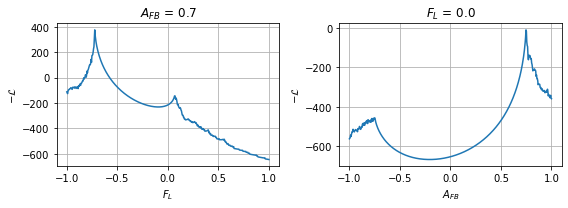

Bin 0: 0.669 pm 0.034, -0.052 pm 0.018. Function minimum considered valid: True


C:\Users\ycwon\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Bin 1: 1.0 pm 0.012, -0.348 pm 0.016. Function minimum considered valid: True
Bin 2: 0.747 pm 0.047, -0.146 pm 0.028. Function minimum considered valid: True
Bin 3: 0.74 pm 0.038, -0.006 pm 0.023. Function minimum considered valid: True
Bin 4: 0.531 pm 0.039, 0.204 pm 0.023. Function minimum considered valid: True
Bin 5: 0.264 pm 0.041, 0.427 pm 0.023. Function minimum considered valid: True
Bin 6: 0.242 pm 0.058, 0.393 pm 0.035. Function minimum considered valid: True
Bin 7: 0.954 pm 0.042, 0.982 pm 0.023. Function minimum considered valid: True
Bin 8: 0.759 pm 0.023, -0.09 pm 0.014. Function minimum considered valid: True
Bin 9: 0.266 pm 0.036, 0.428 pm 0.02. Function minimum considered valid: True


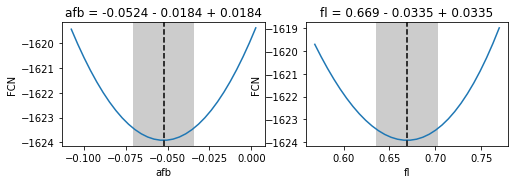

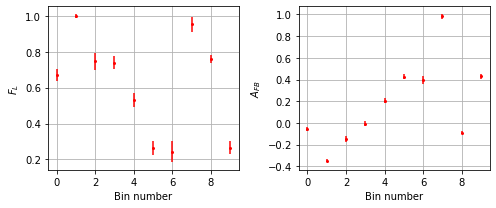

In [47]:
    

#%%


def d2gamma_p_d2q2_dcostheta(fl, afb, cos_theta_l, cos_theta_k, phi, bin_number):
    """
    Returns the pdf defined above
    :param fl: f_l observable
    :param afb: a_fb observable
    :param cos_theta_l: cos(theta_l)
    :return:
    """
    ctl = cos_theta_l
    ctk = cos_theta_k
    phi = phi
    c2tl = 2 * ctl ** 2 - 1
                
    
    acceptance = acceptance_final[bin_number]
    for number in acceptance:
        if number < 0:
            print("negative")
#     print(len(acceptance))

    scalar_array = 3/8 * (3/2 - 1/2 * fl + 1/2 * c2tl * (1 - 3 * fl) + 8/3 * afb * ctl) * acceptance*5
#     print(scalar_array[100:105])
#     print("")
    normalised_scalar_array = scalar_array 
    
    #normalised_scalar_array = normalised_scalar_array[0]
    return normalised_scalar_array

def log_likelihood(fl, afb, _bin):
    """
    Returns the negative log-likelihood of the pdf defined above
    :param fl: f_l observable
    :param afb: a_fb observable
    :param _bin: number of the bin to fit
    :return:
    """
    bin_number = int(_bin)
    _bin = bins[int(_bin)]
    ctl = _bin['costhetal']
    ctk = _bin['costhetak']
    phi = _bin['phi']
    normalised_scalar_array = d2gamma_p_d2q2_dcostheta(fl=fl, afb=afb, cos_theta_l=ctl, cos_theta_k=ctk, phi=phi, bin_number=bin_number)
#     print(- np.sum(np.log(normalised_scalar_array)))
    return - np.sum(np.log(normalised_scalar_array))




#%%

_test_bin = 1
_test_afb = 0.7
_test_fl = 0.0

x = np.linspace(-1, 1, 500)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(x, [log_likelihood(fl=i, afb=_test_afb, _bin=_test_bin) for i in x])
ax1.set_title(r'$A_{FB}$ = ' + str(_test_afb))
ax1.set_xlabel(r'$F_L$')
ax1.set_ylabel(r'$-\mathcal{L}$')
ax1.grid()
ax2.plot(x, [log_likelihood(fl=_test_fl, afb=i, _bin=_test_bin) for i in x])
ax2.set_title(r'$F_{L}$ = ' + str(_test_fl))
ax2.set_xlabel(r'$A_{FB}$')
ax2.set_ylabel(r'$-\mathcal{L}$')
ax2.grid()
plt.tight_layout()
plt.show()

#%%

bin_number_to_check = 0  # bin that we want to check in more details in the next cell
bin_results_to_check = None

log_likelihood.errordef = Minuit.LIKELIHOOD
decimal_places = 3
starting_point = [-0.1,0.0]
fls, fl_errs = [], []
afbs, afb_errs = [], []
for i in range(len(bins)):
    m = Minuit(log_likelihood, fl=starting_point[0], afb=starting_point[1], _bin=i)
    m.fixed['_bin'] = True  # fixing the bin number as we don't want to optimize it
    m.limits=((-1.0, 1.0), (-1.0, 1.0), None)
    m.migrad()
    m.hesse()
    if i == bin_number_to_check:
        bin_results_to_check = m
    fls.append(m.values[0])
    afbs.append(m.values[1])
    fl_errs.append(m.errors[0])
    afb_errs.append(m.errors[1])
    print(f"Bin {i}: {np.round(fls[i], decimal_places)} pm {np.round(fl_errs[i], decimal_places)},", f"{np.round(afbs[i], decimal_places)} pm {np.round(afb_errs[i], decimal_places)}. Function minimum considered valid: {m.fmin.is_valid}")
    
    
#%%


plt.figure(figsize=(8, 5))
plt.subplot(221)
bin_results_to_check.draw_mnprofile('afb', bound=3)
plt.subplot(222)
bin_results_to_check.draw_mnprofile('fl', bound=3)

#%%
'''
bin_to_plot = 3
number_of_bins_in_hist = 25
cos_theta_l_bin = bins[bin_to_plot]['costhetal']
hist, _bins, _ = plt.hist(cos_theta_l_bin, bins=number_of_bins_in_hist)
x = np.linspace(-1, 1, number_of_bins_in_hist)
pdf_multiplier = np.sum(hist) * (np.max(cos_theta_l_bin) - np.min(cos_theta_l_bin)) / number_of_bins_in_hist
y = d2gamma_p_d2q2_dcostheta(fl=fls[bin_to_plot], afb=afbs[bin_to_plot], cos_theta_l=x, cos_theta_k=x, phi=x) * pdf_multiplier
plt.plot(x, y, label=f'Fit for bin {bin_to_plot}')
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.legend()
plt.grid()
plt.show()
plt.tight_layout()
plt.show()
'''
#%%


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
ax1.errorbar(np.linspace(0, len(bins) - 1, len(bins)), fls, yerr=fl_errs, fmt='o', markersize=2, label=r'$F_L$', color='red')
ax2.errorbar(np.linspace(0, len(bins) - 1, len(bins)), afbs, yerr=afb_errs, fmt='o', markersize=2, label=r'$A_{FB}$', color='red')
ax1.grid()
ax2.grid()
ax1.set_ylabel(r'$F_L$')
ax2.set_ylabel(r'$A_{FB}$')
ax1.set_xlabel(r'Bin number')
ax2.set_xlabel(r'Bin number')
plt.tight_layout()
plt.show()